In [1]:
import matplotlib.image as mpimg #we import the necessary libraries
import matplotlib.pyplot as plt
import math
from collections import defaultdict
import time
import collections
import numpy as np

## Problem 1

In [100]:
def glcm(img,theta): #we calculate the matrix in the desired direction for grayscale image
    pi = math.pi
    if theta == 0:
        deltax = int(math.cos(theta)) #we determine starting direction
        deltay = int(math.sin(theta)) # as well as beginning and end 
        x1 = 0
        x2 = img.shape[1]-1
        y1 = 0
        y2 = img.shape[0]
        dirx = 1
        diry = 1
    elif theta == pi/2:
        deltax = int(math.cos(theta))
        deltay = int(math.sin(theta))
        x1 = 0
        x2 = img.shape[1]
        y1 = 0
        y2 = img.shape[0]-1
        dirx = 1
        diry = 1
    elif theta == pi:
        deltay = int(math.cos(theta))
        deltax = int(math.sin(theta))
        x1 = img.shape[1]-1
        x2 = 1
        y1 = 0
        y2 = img.shape[0]-1
        dirx = -1
        diry = 1
    elif theta == 3*pi/2:
        deltax = int(math.cos(theta))
        deltay = int(math.sin(theta))
        x1 = 0
        x2 = img.shape[1]
        y1 = img.shape[0]-1
        y2 = 1
        dirx = 1
        diry = -1
    elif theta == pi/4:
        deltax = math.ceil(math.cos(theta))
        deltay = math.ceil(math.sin(theta))
        x1 = 0
        x2 = img.shape[1]-1
        y1 = 0
        y2 = img.shape[0]-1
        dirx = 1
        diry = 1
    elif theta == 3*pi/4:
        deltax = math.floor(math.cos(theta))
        deltay = math.ceil(math.sin(theta))
        x1 = img.shape[1]-1
        x2 = 1
        y1 = 0
        y2 = img.shape[0]-1
        dirx = -1
        diry = 1
    elif theta == 5*pi/4:
        deltax = math.floor(math.cos(theta))
        deltay = math.floor(math.sin(theta))
        x1 = img.shape[1]-1
        x2 = 1
        y1 = img.shape[0]-1
        y2 = 1
        dirx = -1
        diry = -1
    elif theta == 7*pi/4:
        deltax = math.ceil(math.cos(theta))
        deltay = math.floor(math.sin(theta))
        x1 = 0
        x2 = img.shape[1]-1
        y1 = 1
        y2 = img.shape[0]-1
        dirx = 1
        diry = -1

        
    nopix = list(range(256)) #we list all values
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j][0] in nopix: #if value is in pixel we remove it 
                nopix.remove(img[i][j][0])
    pixval = list(set(list(range(256))).symmetric_difference(set(nopix))) #we keep pixel values appearing in image
    
    ccdict = defaultdict(int) #we create dictionary having all two-value sets
    for i in range(len(pixval)):
        for j in range(i,len(pixval)):
                ccdict[(pixval[i],pixval[j])] = 0
                


    for i in range(y1,y2,diry):
        for j in range(x1,x2,dirx):
            val = (img[i][j][0],img[i+deltay][j+deltax][0]) #if value appears, we add to dictionary
            if val in ccdict.keys():
                ccdict[val] += 1
                
    dicl = ccdict #we transform dictionary into matrix
    mat = []
    row = ["i/j"]
    for i in pixval:
        row.append(i)
    mat.append(row)
    for i in pixval:
        row = []
        row.append(i)
        for j in pixval:
            row.append(ccdict[(i,j)])
        mat.append(row)
            
    
    return mat #we return matrix
                

In [101]:
rose = mpimg.imread("rose.jpeg")
matglcm = glcm(rose,0)

## Problem 2

In [8]:
def bitimg(img,i,j,k): #this function transforms middle pixel into bit
    if img[i][j][k] > img[i-1][j-1][k]:
        b0 = 0
        pad = 8 
    else:
        b0 = 1
    if img[i][j][k] > img[i-1][j][k]:
        b1 = 0
    else:
        b1 = 1
    if img[i][j][k] > img[i-1][j+1][k]:
        b2 = 0
    else:
        b2 = 1
    if img[i][j][k] > img[i][j-1][k]:
        b3 = 0
    else:
        b3 = 1
    if img[i][j][k] > img[i][j+1][k]:
        b4 = 0
    else:
        b4 = 1
    if img[i][j][k] > img[i+1][j-1][k]:
        b5 = 0
    else:
        b5 = 1
    if img[i][j][k] > img[i+1][j][k]:
        b6 = 0
    else:
        b6 = 1
    if img[i][j][k] > img[i+1][j+1][k]:
        b7 = 0
    else:
        b7 = 1

    num0 = str(b0)
    num1 = str(b1)
    num = num0 + num1
    num2 = str(b2)
    num += num2
    num3 = str(b3)
    num += num3
    num4 = str(b4)
    num += num4
    num5 = str(b5)
    num += num5
    num6 = str(b6)
    num += num6
    num7 = str(b7)
    num += num7
    
    return num
    

def lbp(img): #we change every value into its pixel
    imgb = img.copy()
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            numbit0 = bitimg(img,i,j,0)
            numbit1 = bitimg(img,i,j,1)
            numbit2 = bitimg(img,i,j,2)
            imgb[i][j][0] = int(numbit0,2)
            imgb[i][j][1] = int(numbit1,2)
            imgb[i][j][2] = int(numbit2,2)
    return imgb

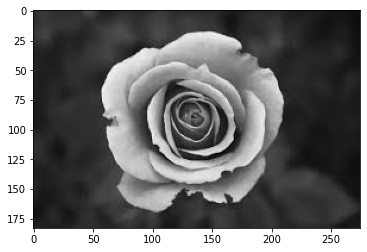

In [9]:
rose = mpimg.imread("rose.jpeg")
plt.imshow(rose)

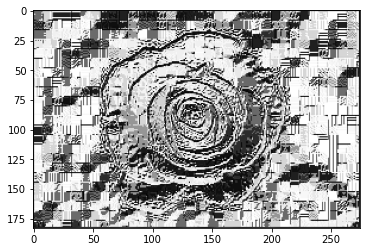

In [10]:
roset = lbp(rose)
plt.imshow(roset)

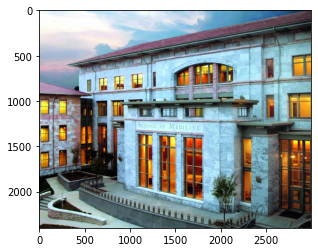

In [11]:
emory = mpimg.imread("emory.jpg")
plt.imshow(emory)

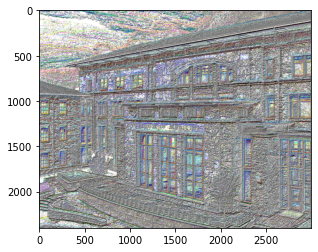

In [12]:
emoryt = lbp(emory)
plt.imshow(emoryt)

## Problem 3

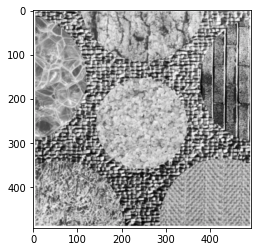

In [34]:
seg = mpimg.imread("seg.png")#conversion to uint8
seg *= 255
seg = seg.astype(np.uint8) 
plt.imshow(seg)

In [256]:
#We partition the image into blocks of 50 pixels to cluster 

hx = 50
hy = 50
hinx = 0
hiny = 0 
hendy = hy
hendx = hx


imgset = []
while hendy < seg.shape[0]:
    while hendx < seg.shape[1]:
        segsub = seg[hiny:hendy,hinx:hendx]
        imgset.append(segsub)
        hinx = hendx
        hendx += hx
    if hendx > seg.shape[1]:
        segsub = seg[hiny:hendy,hinx:seg.shape[1]]
        imgset.append(segsub)
        hinx = 0 
        hendx =hx
    hiny = hendy
    hendy += hy
if hendy > seg.shape[0]:
    while hendx < seg.shape[1]:
        segsub = seg[hiny:seg.shape[0],hinx:hendx]
        imgset.append(segsub)
        hinx = hendx
        hendx += hx
    if hendx > seg.shape[1]:
        segsub = seg[hiny:seg.shape[0],hinx:seg.shape[1]]
        imgset.append(segsub)

In [178]:
#These are most of the feature extractions mentioned in the paper

def Pdx(x,matglcm):
    if x in matglcm[0]:
        indx = matglcm[0].index(x)
        sumx = 0
        for j in range(1,len(matglcm[indx])):
            sumx += matglcm[indx][j]
    else: 
        print("pixel value not in image")
    return sumx
def Pdy(y,matglcm):
    if y in matglcm[0]:
        indy = matglcm[0].index(y)
        sumy = 0
        for i in range(1,len(matglcm)):
            sumy += matglcm[i][indy]
    else: 
        print("pixel value not in image")
    return sumy
def statPy(matglcm):
    listy = []
    for i in matglcm[0][1:]:
        yval = Pdx(i,matglcm)
        listy.append(yval)
    meany = np.mean(listy)
    stdy = np.std(listy)
    return meany,stdy
def statPx(matglcm):
    listx = []
    for j in matglcm[0][1:]:
        xval = Pdy(j,matglcm)
        listx.append(xval)
    meanx = np.mean(listx)
    stdx = np.std(listx)
    return meanx,stdx
def energy(matglcm):
    sumx = 0
    for i in range(1,len(matglcm[0])):
        for j in range(1,len(matglcm[1])):
            a = (matglcm[i][j])**2
            sumx += a
    return sumx
def contrast(matglcm):
    sumx = 0
    for i in range(1,len(matglcm[0])):
        for j in range(1,len(matglcm[1])):
            a = ((i-j)**2)*(matglcm[i][j])
            sumx += a
    return sumx
def homogeneity(matglcm):
    sumx = 0
    for i in range(1,len(matglcm[0])):
        for j in range(1,len(matglcm[1])):
            a = (matglcm[i][j])/(1+abs(i-j))
            sumx += a
    return sumx
def correlation(matglcm):
    sumx = 0
    statsx = statPx(matglcm)
    meansx = statsx[0]
    stsx = statsx[1]
    statsy = statPy(matglcm)
    meansy = statsy[0]
    stsy = statsy[1]
    for i in range(1,len(matglcm[0])):
        for j in range(1,len(matglcm[1])):
            a = (i-stsx)*(j-stsy)*matglcm[i][j]/(stsx*stsy)
            sumx += a
    return sumx 

In [210]:
reg1 = seg[100:150,50:100] #These are regions of true classification and will be used as reference
reg2 = seg[25:75,150:200]
reg3 = seg[100:150,400:450]
reg4 = seg[250:300,250:300]
reg5 = seg[400:450,25:75]
reg6 = seg[400:450,220:270]
reg7 = seg[400:450,400:450]
reg = [reg1,reg2,reg3,reg4,reg5,reg6,reg7]

In [207]:
def getfeat(img,theta): #we obtain eight features in a given direction of theta
    mi = glcm(img,theta)
    mx = statPx(mi)
    meanx = mx[0] #1
    stx = mx[1] #2
    my = statPy(mi)
    meany = my[0] #3
    sty = my[1] #4
    ene = energy(mi) #5
    con = contrast(mi) #6
    hom = homogeneity(mi) #7
    cor = correlation(mi) #8
    featv = [meanx,stx,meany,sty,ene,con,hom,cor]
    return featv

In [301]:
featimg = [] #we use in total 7x8 = 56 features 
pi = math.pi
for i in range(len(imgset)):
    fv0 = getfeat(imgset[i],0)
    fv1 = getfeat(imgset[i],pi/4)
    fv2 = getfeat(imgset[i],pi/2)
    fv3 = getfeat(imgset[i],3*pi/4)
    fv4 = getfeat(imgset[i],pi)
    fv5 = getfeat(imgset[i],5*pi/4)
    fv6 = getfeat(imgset[i],6*pi/4)
    fv = fv0+fv1+fv2+fv3+fv4+fv5+fv6
    featimg.append(fv)

In [302]:
truefeat = [] #these are the features associated with the true values
for i in reg:
    tv0 = getfeat(i,0)
    tv1 = getfeat(i,pi/4)
    tv2 = getfeat(i,pi/2)
    tv3 = getfeat(i,3*pi/4)
    tv4 = getfeat(i,pi)
    tv5 = getfeat(i,5*pi/4)
    tv6 = getfeat(i,6*pi/4)
    tv = tv0+tv1+tv2+tv3+tv4+tv5+tv6
    truefeat.append(tv)

In [303]:
cluster = [] #this uses euclidean distance to find associate each partitioned image to its predicted cluster
for i in featimg:
    mindis = []
    for j in truefeat:
        sum_sq = 0
        for k in range(len(j)):
            s2 = np.square(i[k]-j[k])
            sum_sq += s2
        ed = math.sqrt(sum_sq)
        mindis.append(ed)
    minval = min(mindis)
    c = mindis.index(minval) + 1
    cluster.append(c)

In [304]:
hx = 50 #this colors the full image according to cluster 
hy = 50
hinx = 0
hiny = 0 
hendy = hy
hendx = hx
cref = 0 
segm = seg.copy()
while hendy < seg.shape[0]:
    while hendx < seg.shape[1]:
        if cluster[cref] == 1:
            color1 = 0
            color2 = 0
            color2 = 100
        elif cluster[cref] == 2:
            color1 = 0
            color2 = 100
            color3 = 0
        elif cluster[cref] == 3:
            color1 = 100
            color2 = 0 
            color3 = 0
        elif cluster[cref] == 4:
            color1 = 0
            color2 = 100
            color3 = 100 
        elif cluster[cref] == 5:
            color1 = 100
            color2 = 0
            color3 = 100
        elif cluster[cref] == 6:
            color1 = 100
            color2 = 100
            color3 = 0 
        elif cluster[cref] == 7:
            color1 = 200
            color2 = 100
            color3 = 100
        for i in range(hiny,hendy):
            for j in range(hinx,hendx):
                segm[i][j][0] = .5*color1 +.5*seg[i][j][0]
                segm[i][j][1] = .5*color2 +.5*seg[i][j][1]
                segm[i][j][2] = .5*color3 +.5*seg[i][j][2]
        hinx = hendx
        hendx += hx
        cref += 1
    if hendx > seg.shape[1]:
        for i in range(hiny,hendy):
            for j in range(hinx,segm.shape[1]):
                segm[i][j][0] = .5*color1 +.5*seg[i][j][0]
                segm[i][j][1] = .5*color2 +.5*seg[i][j][1]
                segm[i][j][2] = .5*color3 +.5*seg[i][j][2]
        hinx = 0 
        hendx = hx
        cref += 1
    hiny = hendy
    hendy += hy
if hendy > segm.shape[0]:
    while hendx < segm.shape[1]:
        if cluster[cref] == 1:
            color1 = 0
            color2 = 0
            color2 = 100
        elif cluster[cref] == 2:
            color1 = 0
            color2 = 100
            color3 = 0
        elif cluster[cref] == 3:
            color1 = 100
            color2 = 0 
            color3 = 0
        elif cluster[cref] == 4:
            color1 = 0
            color2 = 100
            color3 = 100 
        elif cluster[cref] == 5:
            color1 = 100
            color2 = 0
            color3 = 100
        elif cluster[cref] == 6:
            color1 = 100
            color2 = 100
            color3 = 0 
        elif cluster[cref] == 7:
            color1 = 200
            color2 = 100
            color3 = 100
        for i in range(hiny,segm.shape[0]):
            for j in range(hinx,hendx):
                segm[i][j][0] = .5*color1 +.5*seg[i][j][0]
                segm[i][j][1] = .5*color2 +.5*seg[i][j][1]
                segm[i][j][2] = .5*color3 +.5*seg[i][j][2]
        hinx = hendx
        hendx += hx
        cref += 1
    if hendx > seg.shape[1]:
        if cluster[cref] == 1:
            color1 = 0
            color2 = 0
            color2 = 100
        elif cluster[cref] == 2:
            color1 = 0
            color2 = 100
            color3 = 0
        elif cluster[cref] == 3:
            color1 = 100
            color2 = 0 
            color3 = 0
        elif cluster[cref] == 4:
            color1 = 0
            color2 = 100
            color3 = 100 
        elif cluster[cref] == 5:
            color1 = 100
            color2 = 0
            color3 = 100
        elif cluster[cref] == 6:
            color1 = 100
            color2 = 100
            color3 = 0 
        elif cluster[cref] == 7:
            color1 = 200
            color2 = 100
            color3 = 100
        for i in range(hiny,segm.shape[0]):
            for j in range(hinx,segm.shape[1]):
                segm[i][j][0] = .5*color1 +.5*seg[i][j][0]
                segm[i][j][1] = .5*color2 +.5*seg[i][j][1]
                segm[i][j][2] = .5*color3 +.5*seg[i][j][2]
                


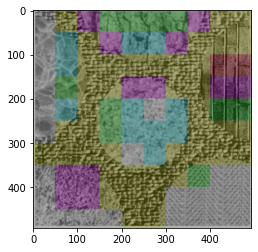

In [282]:
plt.imshow(segm) #this is considering 3 different directions

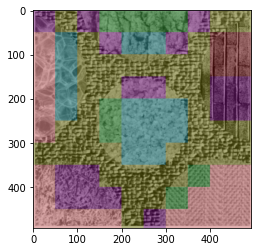

In [299]:
plt.imshow(segm) #this is considering 7 different directions. I feel better partitioning would improve the cluster